# Results Analysis - eBay graph

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [33]:
dict_marker = {"perturbation":"o", "baseline":"X", "gradient":"s"}
pal = sns.color_palette("Paired", 12)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10], "pgexplainer": pal[11]}


In [5]:
sns.set_context("notebook", rc={"legend.fontsize":15, "legend.title_fontsize":20, 
                                "axes.titlesize":22,"axes.labelsize":20,
                               "xtick.labelsize" : 20, "ytick.labelsize" : 20})
sns.set_style("whitegrid")

In [34]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/ebay'

#jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_cc.json'
#ranges = get_param_ranges(jsonpath)

df_res = pd.read_csv(os.path.join(dir, f'exp_result_decode_exp15.csv'), index_col = 0)
res = df_res.groupby(by=['dataset', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()
#res.to_csv(os.path.join(dir, f'ebay_results.csv'), index=False)

In [46]:
#dir = '/cluster/home/kamara/Explain/csv/node_classification/ebay'

#jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_cc.json'
#ranges = get_param_ranges(jsonpath)

#df_res_all = pd.read_csv(os.path.join(dir, f'exp_result_decode_exp13.csv'), index_col = 0)
#df_res_sa_ig = pd.read_csv(os.path.join(dir, f'exp_result_decode_exp11.csv'), index_col = 0) #
#df_res_sa_ig = df_res_sa_ig[(df_res_sa_ig.explainer_name=="sa")|(df_res_sa_ig.explainer_name=="ig")]
#df_res = pd.concat([df_res_all, df_res_sa_ig])
#res = df_res.groupby(by=['dataset', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
#res = res.reset_index()
#res.to_csv(os.path.join(dir, f'ebay_results.csv'), index=False)
#res

In [48]:
df_res.columns = df_res.columns.str.replace('gnn_train_scores__', 'train_')
df_res.columns = df_res.columns.str.replace('gnn_test_scores__', 'test_')
df_res.columns = df_res.columns.str.replace('fidelity__', '')
df_res.columns = df_res.columns.str.replace('transformed_mask_infos__', '')
df_res.columns = df_res.columns.str.replace('infos__', '')
df_res.columns = df_res.columns.str.replace('initial_edge_mask_infos__', '')
df_res = df_res.reset_index(drop=True)

In [49]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx', 'pgexplainer'] :
      return('perturbation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_res['type'] = df_res.apply(lambda row: explainer_type(row), axis=1)

In [50]:
df_res["1-fidelity_acc-"] = 1- df_res["fidelity_acc-"]
df_res["1-fidelity_prob-"] = 1- df_res["fidelity_prob-"]
df_res['charact_prob'] = 2 * df_res['fidelity_prob+'] * (1-df_res['fidelity_prob-'])/ (df_res['fidelity_prob+']  + 1-df_res['fidelity_prob-'])
df_res['charact_acc'] = 2 * df_res['fidelity_acc+'] * (1-df_res['fidelity_acc-'])/ (df_res['fidelity_acc+']  + 1-df_res['fidelity_acc-'])


ZeroDivisionError: float division by zero

In [51]:
df_res["1-fidelity_gnn_acc-"] = 1- df_res["fidelity_gnn_acc-"]
df_res["1-fidelity_gnn_prob-"] = 1- df_res["fidelity_gnn_prob-"]
df_res['charact_gnn_prob'] = 2 * df_res['fidelity_gnn_prob+'] * (1-df_res['fidelity_gnn_prob-'])/ (df_res['fidelity_gnn_prob+']  + 1-df_res['fidelity_gnn_prob-'])
df_res['charact_gnn_acc'] = 2 * df_res['fidelity_gnn_acc+'] * (1-df_res['fidelity_gnn_acc-'])/ (df_res['fidelity_gnn_acc+']  + 1-df_res['fidelity_gnn_acc-'])


In [52]:
#df_res = df_res.reset_index(drop=True)
#df_res = df_res[df_res.explainer_name!="pgexplainer"]
df_res.columns

Index(['1-fidelity_acc-', '1-fidelity_gnn_acc-', '1-fidelity_gnn_prob-',
       '1-fidelity_prob-', 'charact_acc', 'charact_gnn_acc',
       'charact_gnn_prob', 'charact_prob', 'dataset', 'edge_mask_size_init',
       'edge_mask_sparsity_init', 'explain_graph', 'explainer',
       'explainer_name', 'fidelity_acc+', 'fidelity_acc-', 'fidelity_gnn_acc+',
       'fidelity_gnn_acc-', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-',
       'fidelity_prob+', 'fidelity_prob-', 'groundtruth target', 'hard_mask',
       'initial_edge_mask_mask_entropy', 'initial_edge_mask_mask_size',
       'initial_edge_mask_max_avg', 'mask_entropy', 'mask_size', 'max_avg',
       'num_test', 'num_test_final', 'number_of_edges', 'seed', 'test_acc',
       'test_f1-score', 'test_prec', 'test_recall', 'test_roc_auc', 'time',
       'topk', 'train_acc', 'train_f1-score', 'train_prec', 'train_recall',
       'train_roc_auc', 'true_label_as_target', 'type'],
      dtype='object')

In [53]:
df_res.loc[df_res['true_label_as_target']==False, 'charact_prob'] = df_res['charact_gnn_prob']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_prob+'] = df_res['fidelity_gnn_prob+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_prob-"] = df_res["1-fidelity_gnn_prob-"]

df_res.loc[df_res['true_label_as_target']==False, 'charact_acc'] = df_res['charact_gnn_acc']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_acc+'] = df_res['fidelity_gnn_acc+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_acc-"] = df_res["1-fidelity_gnn_acc-"]

In [54]:
# Drop duplicate columns
df_res = df_res.T.groupby(level=0).first().T

In [55]:
topk_val = 10
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc['Characterization'] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Characterization'])

dfc = pd.pivot_table(dfc, values=['Characterization'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc = dfc.sort_values(by=['mean_rank'])
dfc

/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Characterization,mean_rank,final_rank
dataset,ebay_small,,
explainer_name,,,
pagerank,1.0,1.0,1.0
pgmexplainer,2.0,2.0,2.0
gnnexplainer,3.0,3.0,3.0
sa,4.0,4.0,4.0
distance,5.0,5.0,5.0
gradcam,6.0,6.0,6.0
occlusion,7.0,7.0,7.0
basic_gnnexplainer,8.0,8.0,8.0


In [56]:
dfc.columns = dfc.columns.droplevel(0) #remove amount
dfc.columns.name = None               #remove categories
dfc = dfc.reset_index()
dfc['type'] = dfc.apply(lambda row: explainer_type(row), axis=1)

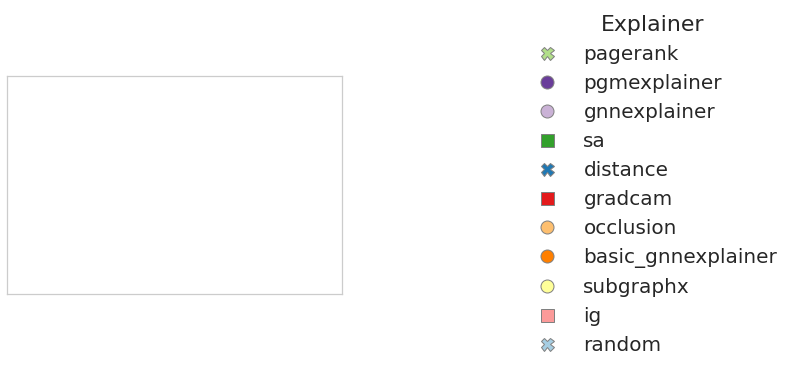

In [60]:
explainer_to_type_dict = dfc.set_index("explainer_name")["type"].to_dict()
handles, labels = [], []
for key, val in explainer_to_type_dict.items():
    # Using Line2D to create the markers for the legend. This is the creation of the proxy artists.
    handles.append(Line2D([0], [0], linewidth=0, color="grey", marker=dict_marker[val], markersize=13, markerfacecolor=dict_color[key]))
    labels.append(key)


# Calling the handles and labels to create the legend, where the handles are the club and circle created previously, and the labels are what the markers are labeled in the legend. Also moves the legend outside the figure
leg = plt.legend(handles,labels, loc = "center left", bbox_to_anchor = (1.5, 0.5), numpoints = 1, title="Explainer", frameon=False)

plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.savefig('/cluster/home/kamara/Explain/figures/ebay/legend_charact_rank_k10_1expe.pdf', bbox_inches='tight')
plt.savefig('/cluster/home/kamara/Explain/figures/ebay/legend_charact_rank_k10_1expe.png', bbox_inches='tight')

## GNN scores

In [17]:
df_res[['train_prec', 'train_recall',
       'train_f1-score', 'train_acc', 'test_prec', 'test_recall',
       'test_f1-score', 'test_acc']].drop_duplicates()

,train_prec,train_recall,train_f1-score,train_acc,test_prec,test_recall,test_f1-score,test_acc
0,0.561921,0.688501,0.588186,0.950977,0.565995,0.695921,0.594005,0.953165


## Performance VS Time

In [15]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

def mean_str(col):
    if is_numeric_dtype(col):
        return col.mean()
    else:
        return col.unique() if col.nunique() == 1 else np.NaN

In [16]:
df_gen = df_res[df_res.topk == 10]
df_gen = df_gen.groupby(['explainer_name', 'true_label_as_target', 'hard_mask', 'type']).agg(mean_str)#.mean()
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

In [17]:
df_gen

,explainer_name,true_label_as_target,hard_mask,type,1-fidelity_acc-,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,1-fidelity_prob-,charact_acc,charact_gnn_acc,...,test_prec,test_recall,test_roc_auc,time,topk,train_acc,train_f1-score,train_prec,train_recall,train_roc_auc
0,basic_gnnexplainer,Model,Soft Mask,pertubation,0.660000,0.660000,0.871061,0.871061,0.142703,0.142703,...,0.565995,0.695921,0.695921,3.6548,10,0.950977,0.588186,0.561921,0.688501,0.688501
1,basic_gnnexplainer,Model,Hard mask,pertubation,0.810000,0.810000,0.935361,0.935361,0.238737,0.238737,...,0.565995,0.695921,0.695921,3.6150,10,0.950977,0.588186,0.561921,0.688501,0.688501
2,basic_gnnexplainer,Phenomenon,Soft Mask,pertubation,0.640000,NaN,NaN,1.129956,0.126197,NaN,...,0.565995,0.695921,0.695921,3.5994,10,0.950977,0.588186,0.561921,0.688501,0.688501
3,basic_gnnexplainer,Phenomenon,Hard mask,pertubation,0.770000,NaN,NaN,1.072939,0.291789,NaN,...,0.565995,0.695921,0.695921,3.7371,10,0.950977,0.588186,0.561921,0.688501,0.688501
4,distance,Model,Soft Mask,baseline,0.860000,0.860000,0.927475,0.927475,0.129462,0.129462,...,0.565995,0.695921,0.695921,9.7778,10,0.950977,0.588186,0.561921,0.688501,0.688501
5,distance,Model,Hard mask,baseline,0.910000,0.910000,0.958181,0.958181,0.515906,0.515906,...,0.565995,0.695921,0.695921,9.8742,10,0.950977,0.588186,0.561921,0.688501,0.688501
6,distance,Phenomenon,Soft Mask,baseline,0.860000,NaN,NaN,1.066069,0.129462,NaN,...,0.565995,0.695921,0.695921,9.7205,10,0.950977,0.588186,0.561921,0.688501,0.688501
7,distance,Phenomenon,Hard mask,baseline,0.910000,NaN,NaN,1.031678,0.515906,NaN,...,0.565995,0.695921,0.695921,9.7698,10,0.950977,0.588186,0.561921,0.688501,0.688501
8,gnnexplainer,Model,Soft Mask,pertubation,0.790000,0.790000,0.895428,0.895428,0.736622,0.736622,...,0.565995,0.695921,0.695921,3.5779,10,0.950977,0.588186,0.561921,0.688501,0.688501
9,gnnexplainer,Model,Hard mask,pertubation,0.900000,0.900000,0.960360,0.960360,0.806135,0.806135,...,0.565995,0.695921,0.695921,3.5497,10,0.950977,0.588186,0.561921,0.688501,0.688501


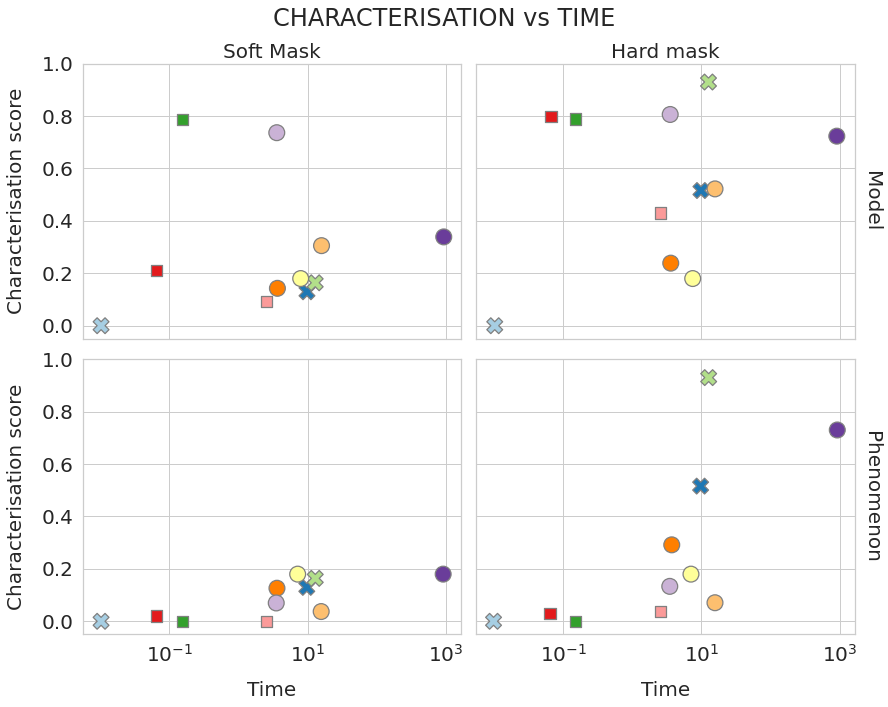

In [19]:
df_gen.columns = [n if n != "explainer_name" else "Explainer" for n in df_gen.columns]
df_gen.columns = [n if n != "type" else "Type" for n in df_gen.columns]

g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=5, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="time", y="charact_acc",
    hue="Explainer", palette=dict_color, s=250, style="Type", alpha =1, edgecolor="grey").set(xscale = 'log')
g.fig.suptitle("CHARACTERISATION vs TIME", fontsize=24)
g.set(ylim=(-0.05,1))
g.fig.subplots_adjust(top=0.88)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Time", y_var="Characterisation score", labelpad=15)

plt.tight_layout()
plt.show()
g.savefig('/cluster/home/kamara/Explain/figures/ebay/charact_vs_time_k_10_5expe.pdf', bbox_inches='tight')
g.savefig('/cluster/home/kamara/Explain/figures/ebay/charact_vs_time_k_10_5expe.png', bbox_inches='tight')


# Explanation type 
Default topk = 10

In [20]:
df = df_res[df_res['topk']==10]
#df = df_res

## Avg on all datasets

In [21]:
df_gen = df.groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).agg(mean_str)
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

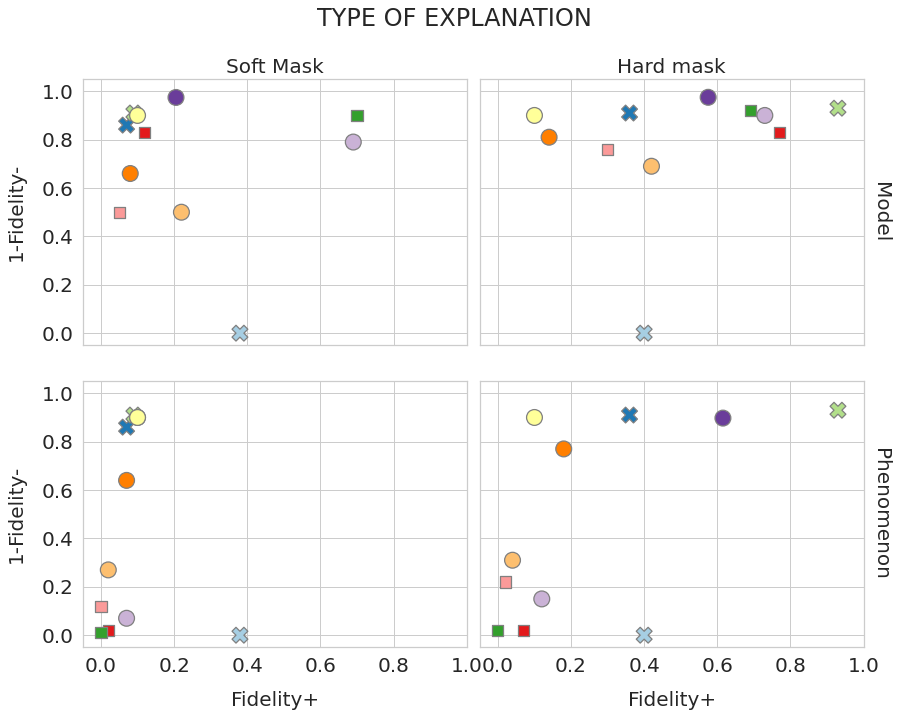

In [24]:
df_gen.columns = [n if n != "explainer_name" else "Explainer" for n in df_gen.columns]
df_gen.columns = [n if n != "type" else "Type" for n in df_gen.columns]
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=5, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="fidelity_acc+", y="1-fidelity_acc-",
    hue="Explainer", palette=dict_color, style="Type", alpha =1, edgecolor="grey", s=250)
g.fig.suptitle("TYPE OF EXPLANATION", fontsize=24)
g.set(ylim=(-0.05,1.05))
g.set(xlim=(-0.05,1))
 
g.fig.subplots_adjust(top=0.88)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-", labelpad=15)

plt.show()
g.savefig('/cluster/home/kamara/Explain/figures/ebay/type_k_10_5expe.pdf', bbox_inches='tight')
g.savefig('/cluster/home/kamara/Explain/figures/ebay/type_k_10_5expe.png', bbox_inches='tight')


## Connectivity

In [25]:
sns.set_context("notebook", rc={"legend.fontsize":20, "legend.title_fontsize":22, 
                                "axes.titlesize":24,"axes.labelsize":20,
                               "xtick.labelsize" : 20, "ytick.labelsize" : 20})
sns.set_style("whitegrid")

ValueError: Could not interpret value `cc_ratio` for parameter `y`

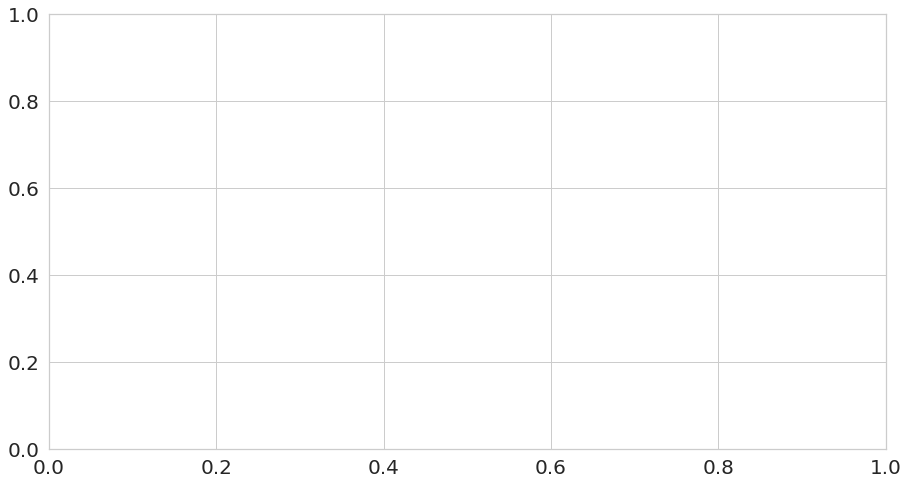

In [26]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_res, x="topk", y='cc_ratio',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax, linewidth=2.8, markersize=8)

plt.title('Explanation connectivity', fontsize=24, pad=20)
# Put the legend out of the figure
leg = g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")
for i in range(12):
    leg.get_lines()[i].set_linewidth(6)
plt.subplots_adjust(hspace = 0.8)
plt.ylim(-0.05,1)
plt.xlabel("topk")
plt.ylabel("Connected Component Ratio")
plt.show()
fig.savefig('/cluster/home/kamara/Explain/figures/ebay/connectivity.pdf', bbox_inches='tight')

# Mask properties vs Performance 
Sparsity = 0 bc we are interested in the initial masks (without transformation)

In [38]:
df = df_res[df_res['topk']==100]
#df = df_res

In [39]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


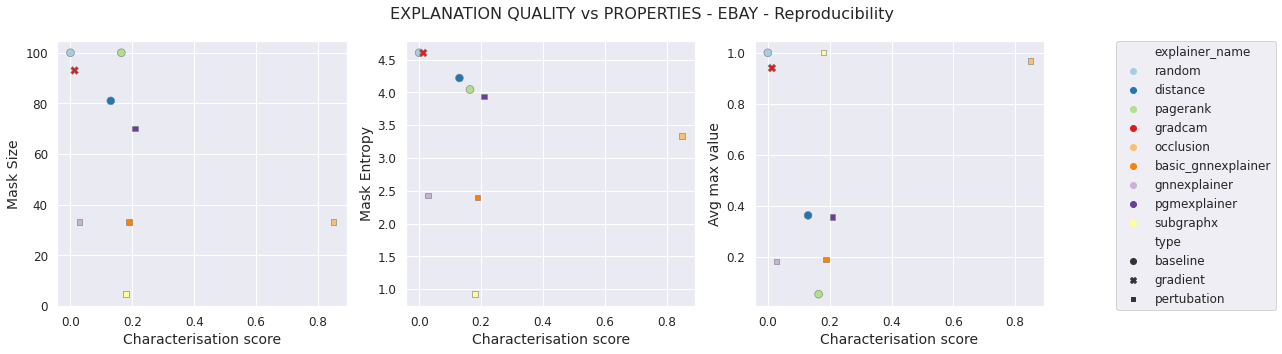

In [45]:
df_mask_data = df[(df['true_label_as_target']==True)&(df['hard_mask']==False)]
fig, axs = plt.subplots(1,3, figsize=(18, 5), sharex=True)

g1 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="transformed_mask_mask_size",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey", ax = axs[0], legend=False)
axs[0].set_ylabel('Mask Size')
axs[0].set_xlabel('Characterisation score')

g2 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="transformed_mask_mask_entropy",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey", ax = axs[1], legend=False)
axs[1].set_ylabel('Mask Entropy')
axs[1].set_xlabel('Characterisation score')

g3 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="transformed_mask_max_avg",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey", ax = axs[2])
axs[2].set_ylabel('Avg max value')
axs[2].set_xlabel('Characterisation score')

# produce a legend with the unique colors from the scatter
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
fig.suptitle('EXPLANATION QUALITY vs PROPERTIES - EBAY - Reproducibility', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
#fig.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_properties/fig_mask_prop_{data}_prob.pdf')
#fig.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_properties/fig_mask_prop_{data}_prob.png')
